In [1]:
#Importing the required basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Apply the default theme
sns.set_theme()

In [2]:
#Loading datafile into panda dataframe
df = pd.read_csv('/kaggle/input/superstore-data/superstore_data.csv')
df.shape

(2240, 22)

In [3]:
#Show 1000's of data
df.head(1000)

Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     1826        1970  Graduation       Divorced  84835.0        0         0   
1        1        1961  Graduation         Single  57091.0        0         0   
2    10476        1958  Graduation        Married  67267.0        0         1   
3     1386        1967  Graduation       Together  32474.0        1         1   
4     5371        1989  Graduation         Single  21474.0        1         0   
..     ...         ...         ...            ...      ...      ...       ...   
995  10176        1968  Graduation         Single  57107.0        0         1   
996   3507        1970  Graduation         Single  76467.0        1         0   
997   9235        1957  Graduation         Single      NaN        1         1   
998  10341        1948  Graduation       Together  51315.0        0         0   
999   2639        1966  Graduation         Single  43602.0        1         1   

    Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0     6/16/2014        0       189  ...              111               189   
1     6/15/2014        0       464  ...                7                 0   
2     5/13/2014        0       134  ...               15                 2   
3     11/5/2014        0        10  ...                0                 0   
4      8/4/2014        0         6  ...               11                 0   
..          ...      ...       ...  ...              ...               ...   
995   8/24/2012       44       159  ...                0                 0   
996   8/17/2012       44       676  ...              210                44   
997   5/27/2014       45         7  ...                2                 0   
998   2/23/2014       45        68  ...               16                30   
999   10/1/2014       45        19  ...               10                 3   

     MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0             218                  1                4                    4   
1              37                  1                7                    3   
2              30                  1                3                    2   
3               0                  1                1                    0   
4              34                  2                3                    1   
..            ...                ...              ...                  ...   
995           137                  7                4                    4   
996            58                  2                2                    5   
997             1                  1                1                    0   
998            41                  1                2                    2   
999            19                  3                3                    1   

     NumStorePurchases  NumWebVisitsMonth  Response  Complain  
0                    6                  1         1         0  
1                    7                  5         1         0  
2                    5                  2         0         0  
3                    2                  7         0         0  
4                    2                  7         1         0  
..                 ...                ...       ...       ...  
995                  8                  8         1         0  
996                  5                  6         1         0  
997                  2                  7         0         0  
998                  5                  2         0         0  
999                  2                  6         0         0  

[1000 rows x 22 columns]

In [4]:
#View basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#View Descriptive statistics
df.describe()

Id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

In [6]:
#The correlation between various variables
df.corr(numeric_only=True)

Id  Year_Birth    Income   Kidhome  Teenhome  \
Id                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
Id                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
Response            -0.198437  0.247254   0.125289         0.236335   
Complain             0.013231 -0.039007  -0.005166        -0.023483   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Id                         -0.024475         -0.007642     -0.013438   
Year_Birth                 -0.041625         -0.018133     -0.061818   
Income                      0.438871          0.440744      0.325916   
Kidhome                    -0.387644         -0.370673     -0.349595   
Teenhome                   -0.204187         -0.162475     -0.021725   
Recency                     0.001079          0.022670      0.016693   
MntWines                    0.399753          0.386581      0.387516   
MntFruits                   0.594804          0.567164      0.392995   
MntMeatProducts             0.568402          0.523846      0.350609   
MntFishProducts             1.000000          0.579870      0.422875   
MntSweetProducts            0.579870          1.000000      0.369724   
MntGoldProds                0.422875          0.369724      1.000000   
NumDealsPurchases          -0.139361         -0.120100      0.049085   
NumWebPurchases             0.293681          0.348544      0.421836   
NumCatalogPurchases      

In [7]:
#To find out the correlation between variables with the target class "Response"
corrMatrix = df.corr(numeric_only=True)["Response"].sort_values(ascending=True)
print(corrMatrix)

Recency               -0.198437
Teenhome              -0.154446
Kidhome               -0.080008
Id                    -0.021968
NumWebVisitsMonth     -0.003987
Complain              -0.001707
NumDealsPurchases      0.002238
Year_Birth             0.021325
NumStorePurchases      0.039363
MntFishProducts        0.111331
MntSweetProducts       0.117372
MntFruits              0.125289
Income                 0.133047
MntGoldProds           0.139850
NumWebPurchases        0.148730
NumCatalogPurchases    0.220810
MntMeatProducts        0.236335
MntWines               0.247254
Response               1.000000
Name: Response, dtype: float64


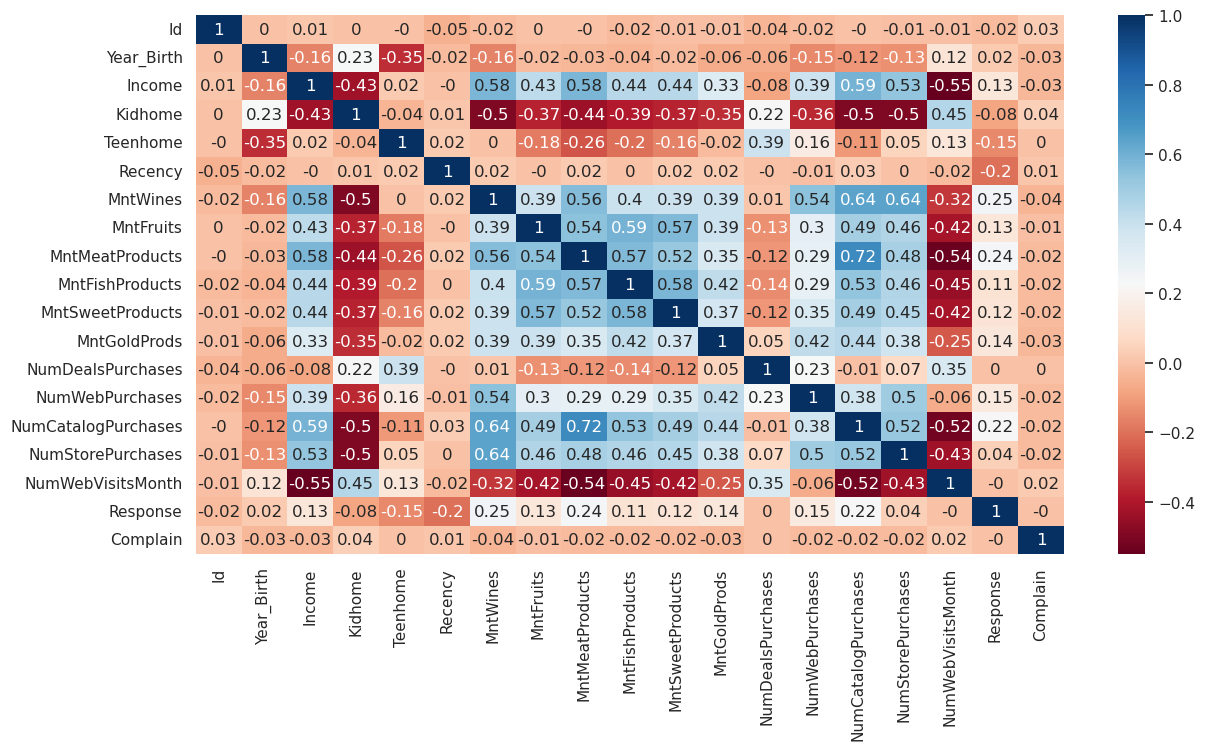

In [8]:
#showing correlation matrix for all variables
corrHeatMap = df.corr(numeric_only=True).round(2)
plt.figure(figsize = (14,7))
sns.heatmap(corrHeatMap, cmap='RdBu',annot=True)
plt.show()

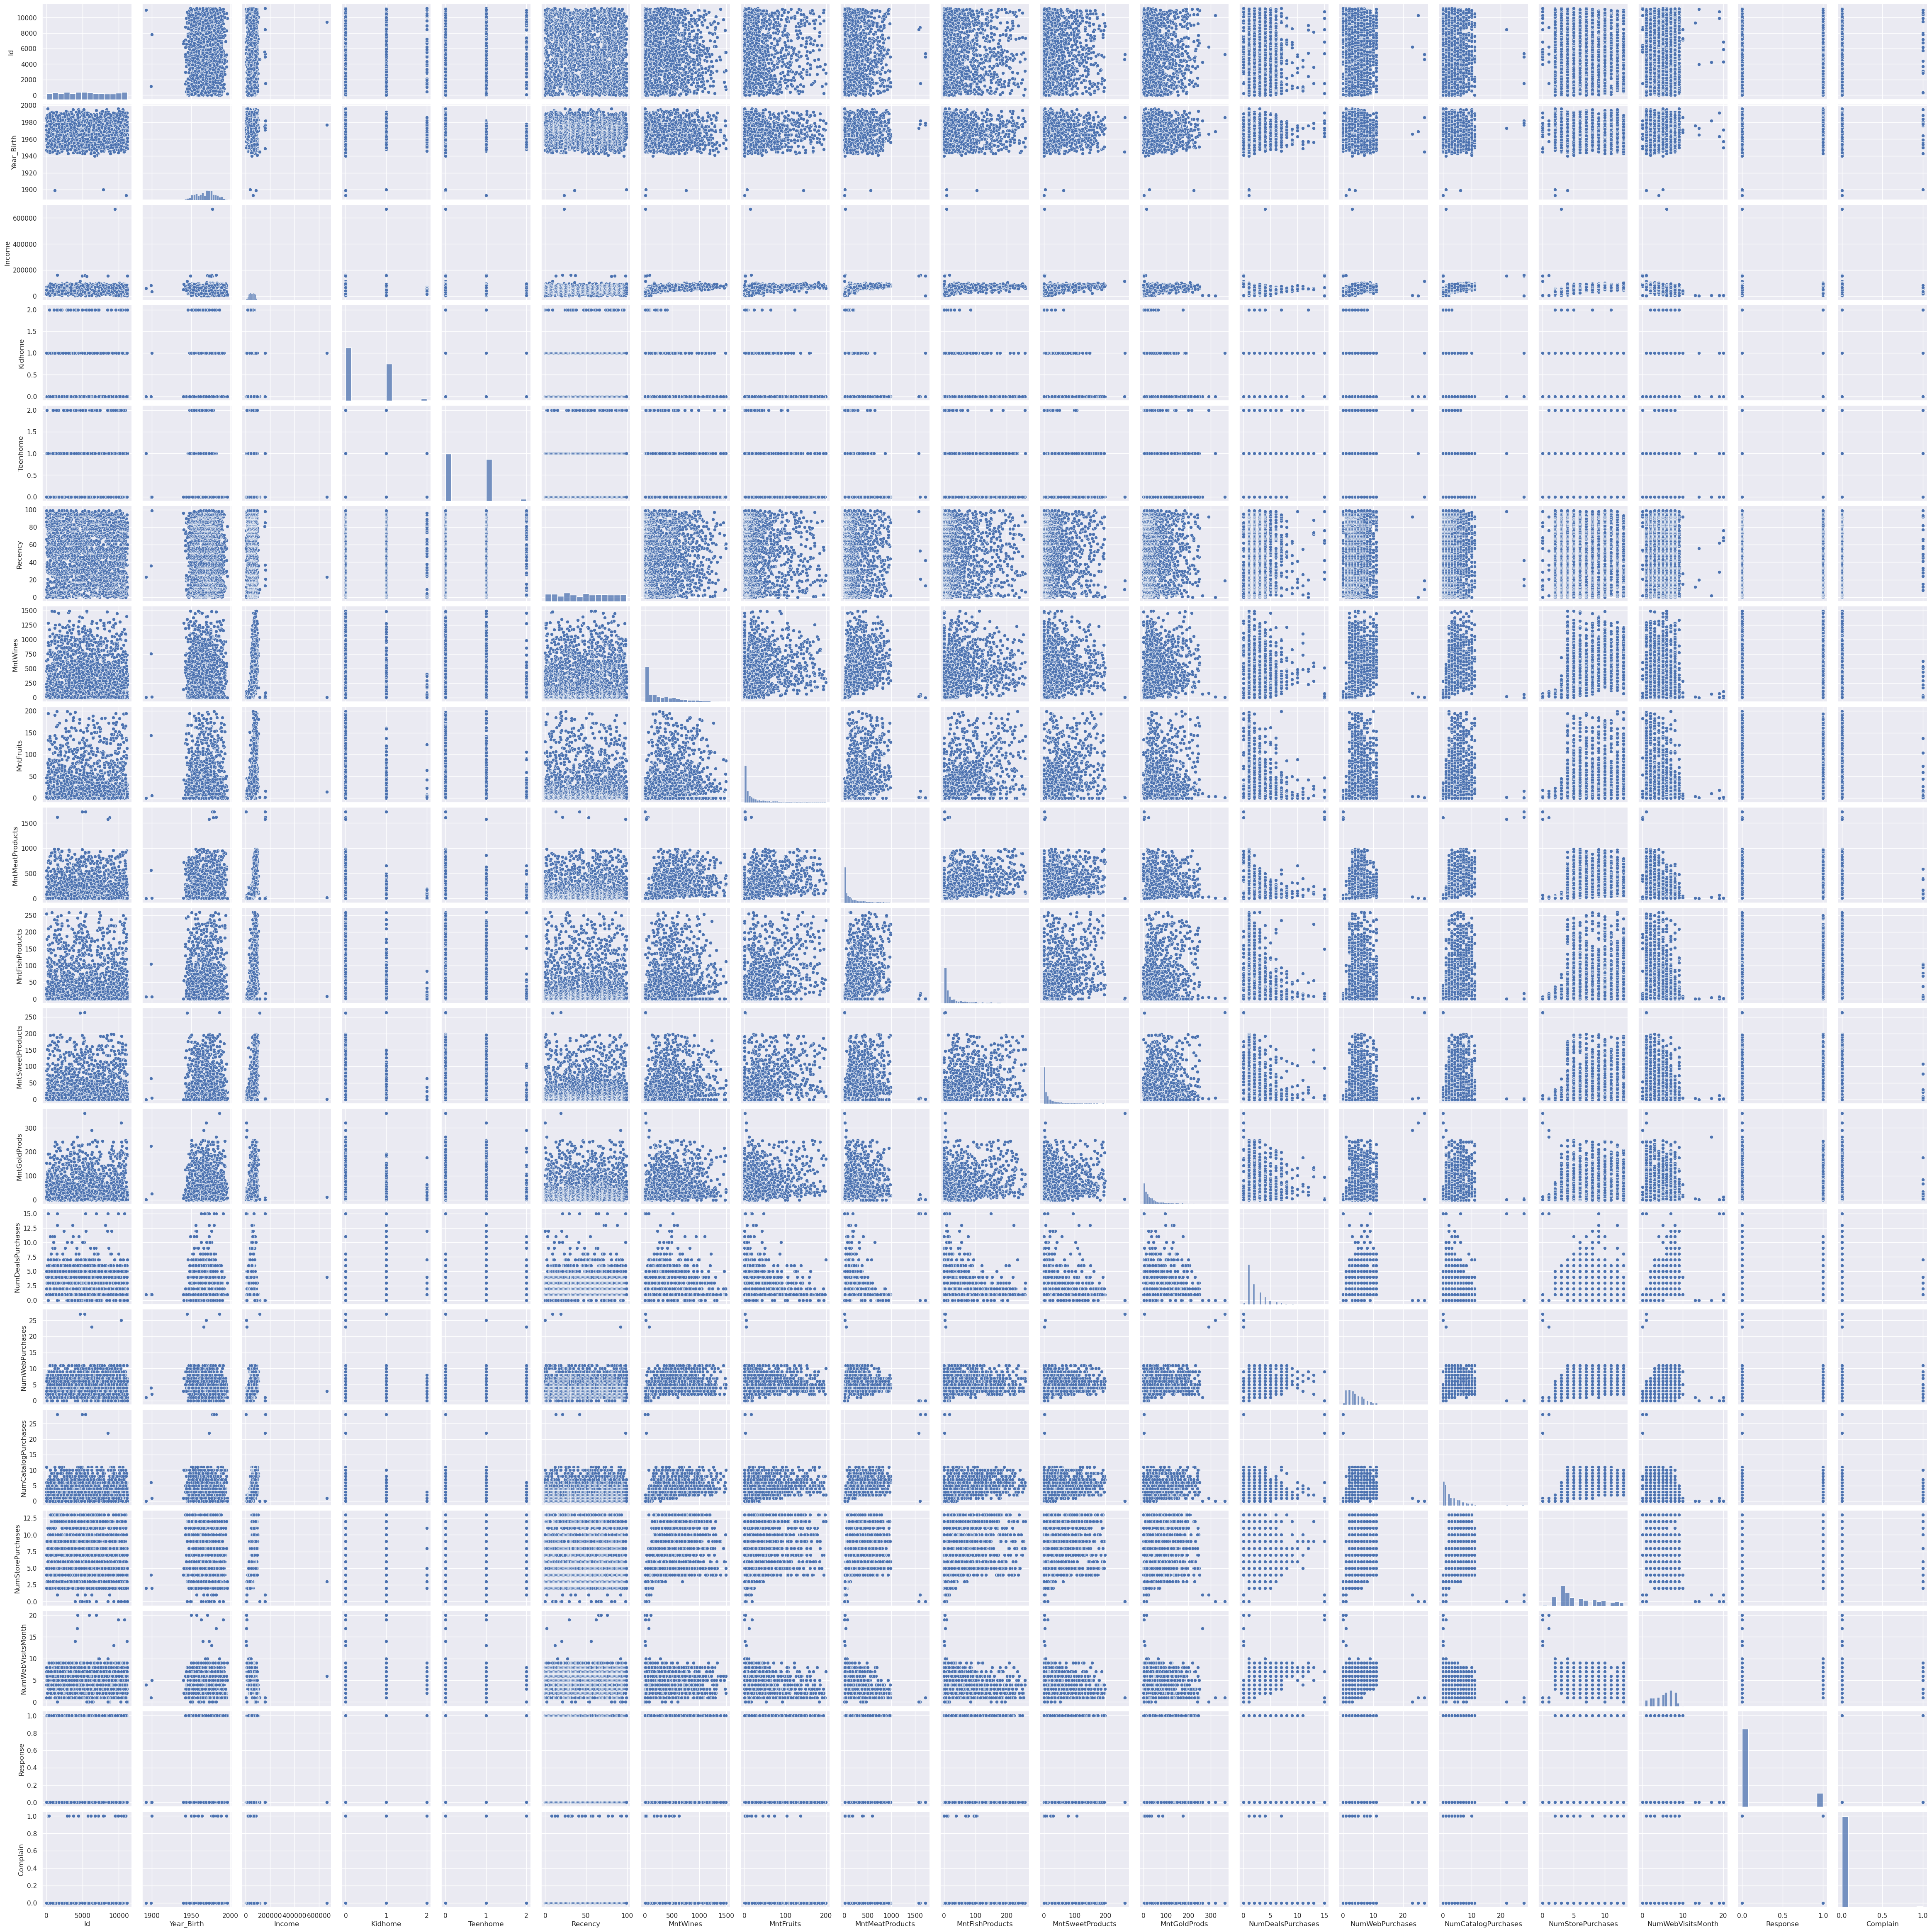

In [9]:
#Basic correlogram 
sns.pairplot(df,diag_kind="hist")

<Axes: ylabel='Education'>

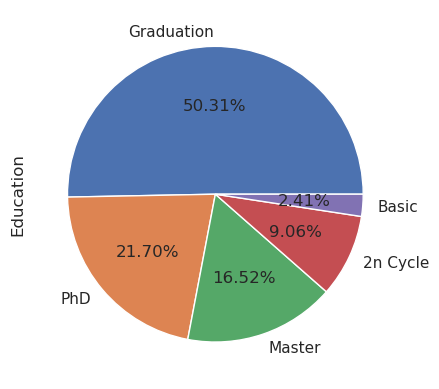

In [10]:
df['Education'].value_counts().plot.pie(autopct='%1.2f%%')

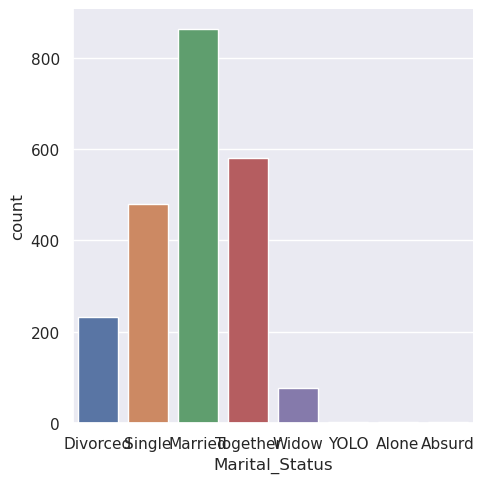

In [11]:
sns.catplot(x='Marital_Status',kind='count',data=df)

In [12]:
#columns = list(df)

#for i in columns[8:]:
   # plt.figure()
   # hist1, edgesl = np.histogram(df[i])
    #plt.bar(edgesl[:-1],hist1,width=edgesl[1:]-edgesl[:-1])
    #plt.xlabel(i)
    #plt.show()

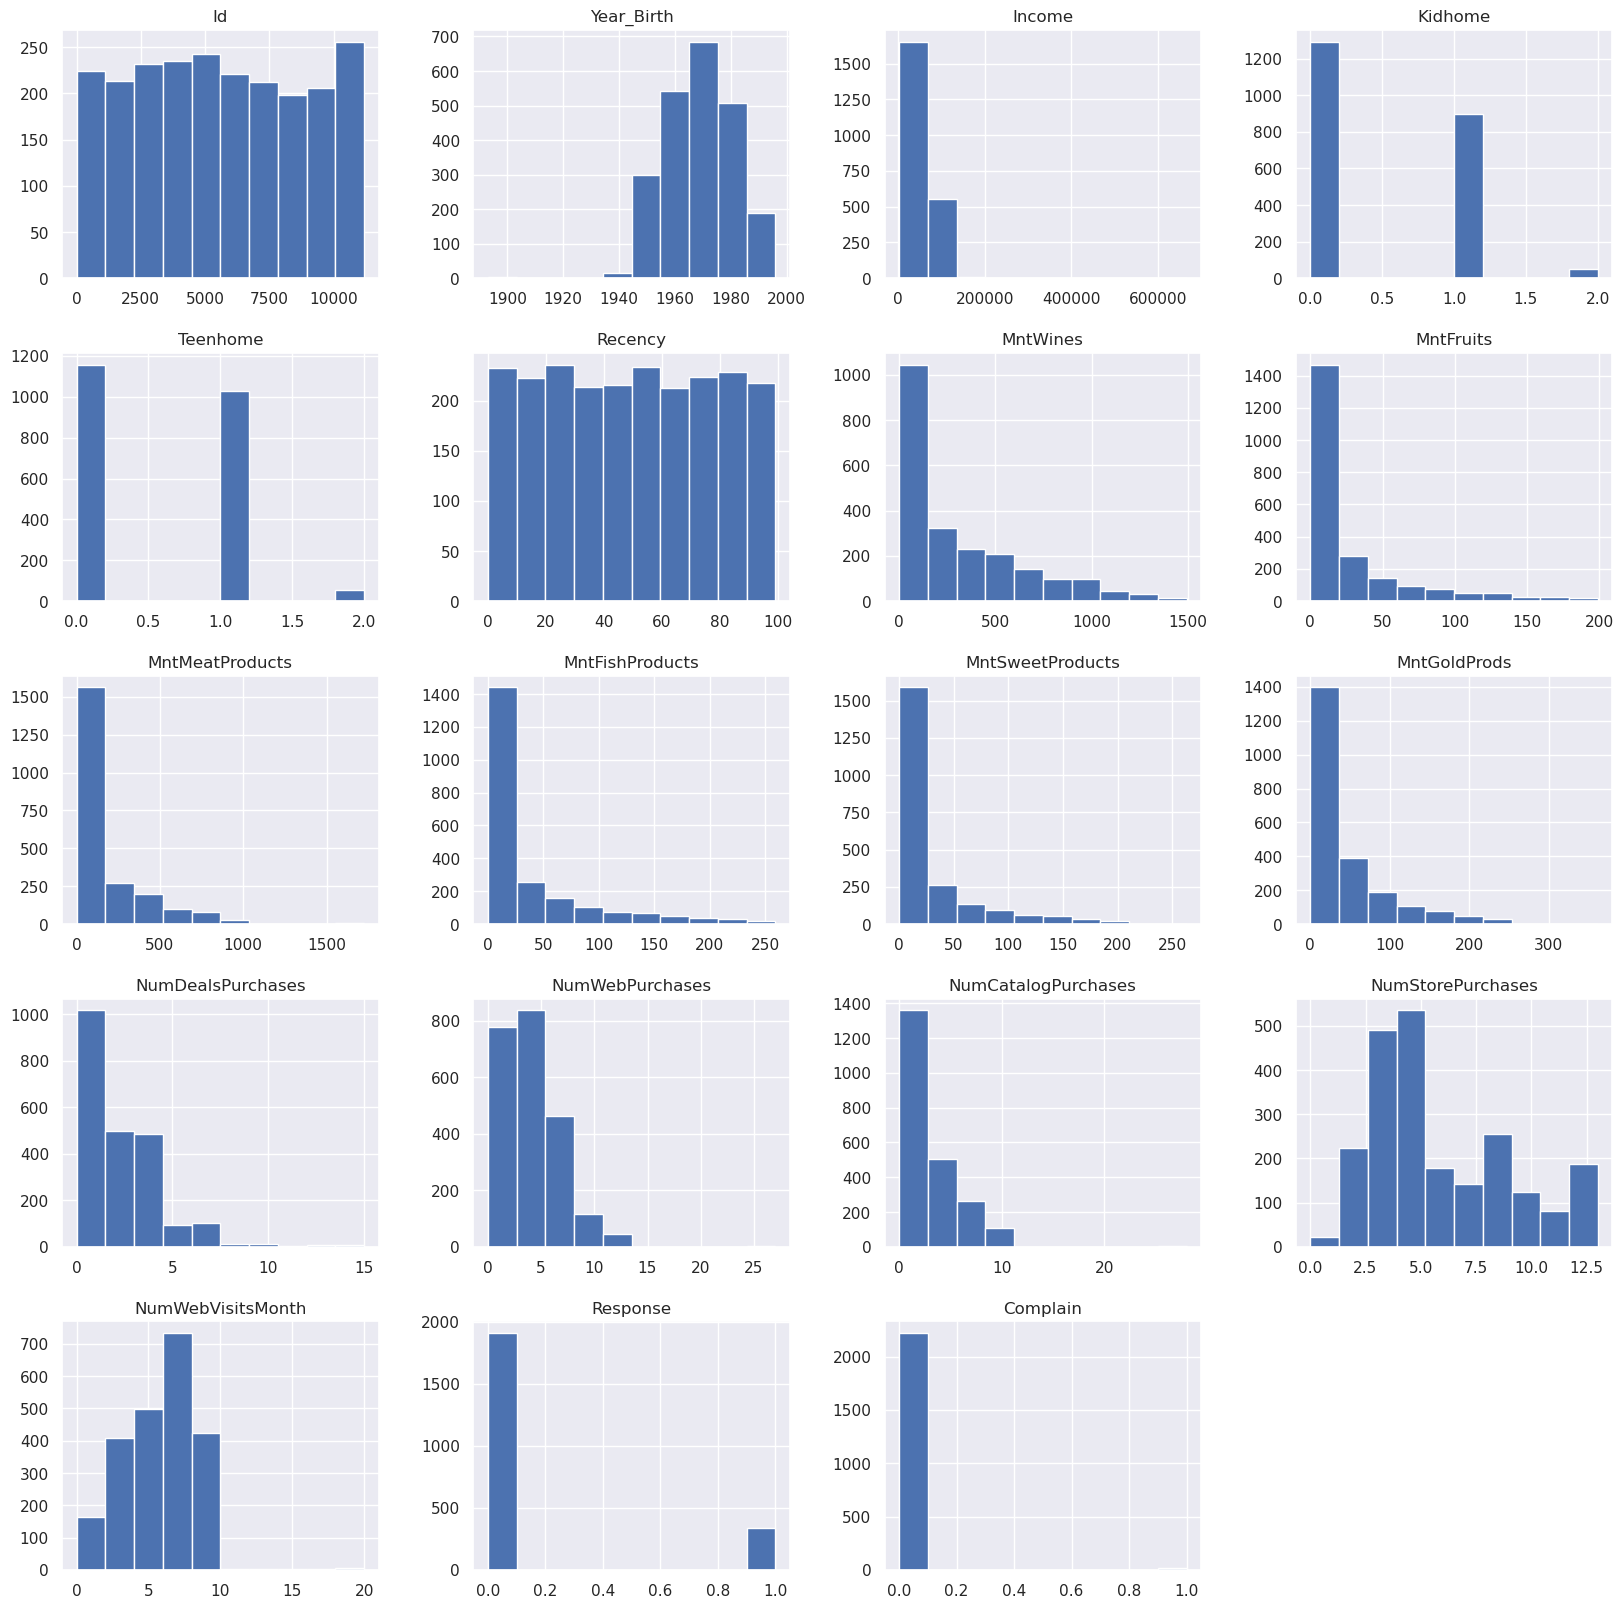

In [13]:
#visualize how 1-dimensional data is distributed across certain
df.hist(figsize=(20,20))
plt.show()

In [14]:
#To search for any duplicate values in the data
df.duplicated().sum()

0

In [16]:
#Finds any unique values in a column
#unique values
df['Income'].unique()

array([84835., 57091., 67267., ..., 46310., 65819., 94871.])

In [15]:
##Finds any unique values in a column
#unique values
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [17]:
##Finds any unique values in a column
#unique values
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [18]:
#To see the count of each category
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [19]:
#To see the count of each category
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [20]:
#To see the count of each category
df["Dt_Customer"].value_counts()

8/31/2012    12
12/9/2012    11
2/14/2013    11
12/5/2014    11
8/20/2013    10
             ..
5/9/2012      1
9/11/2013     1
5/16/2013     1
7/20/2013     1
1/9/2012      1
Name: Dt_Customer, Length: 663, dtype: int64

In [22]:
#To search for any NULL values
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [23]:
#The income column contains NULL values
#We use the Replace method to solve the problem of NULL values
df.replace(np.nan,'0',inplace = True)

#anther option to deel with missing values
#df['Income']=df['Income'].fillna(df['Income'].mode()[0])

#To check that there are no NULL values after using the method
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [24]:
#What is the data type for each attribute.
df.dtypes

Id                      int64
Year_Birth              int64
Education              object
Marital_Status         object
Income                 object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
Response                int64
Complain                int64
dtype: object

In [25]:
#convert the Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
#Determine the number of columns
#columns=['Id','Year_Birth','Income','Dt_Customer','Education','Marital_Status','Recency','NumDealsPurchases','NumWebPurchases','NumStorePurchases','Complain','Response']
#df = df[columns]
#Determine the number of rows
#df.head(1000)

In [28]:
#Make a copy of the data
data_super=df.copy()

In [30]:
#to convert its type to string
data_super['Response']= data_super['Response'].astype('str')

In [31]:
#Consent replaces 1 and rejection replaces 0
data_super['Response'] = data_super['Response'].replace(['1'], 'Consent')
data_super['Response'] = data_super['Response'].replace(['0'], 'Reject')
data_super['Response'].value_counts()

Reject     1906
Consent     334
Name: Response, dtype: int64

**The models**

In [49]:
df = df.drop(['Id', 'Dt_Customer'], axis = 1)

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Education = LabelEncoder()
label_encoder_Marital_Status = LabelEncoder()

df['Education'] = label_encoder_Education.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder_Marital_Status.fit_transform(df['Marital_Status'])

In [52]:
#Separating into features and target.
X = df.drop('Response', axis = 1)
X = X.values
y = df['Response']

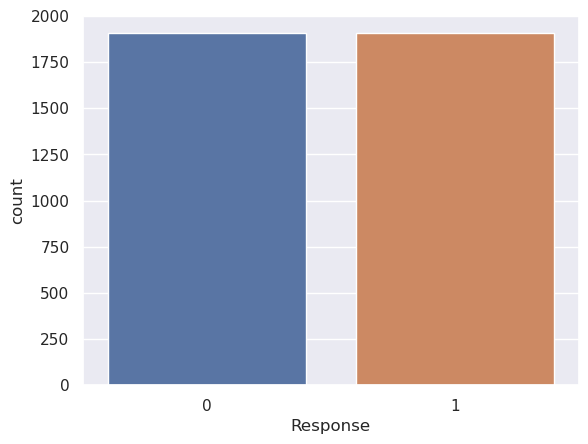

In [53]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [54]:
X.shape, y.shape

((3812, 19), (3812,))

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

 *KNN*

In [58]:
#we use the K-neighbors Model,with GridSearch Model to figure out the best metrics to use in this model.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8871814092953523)

In [59]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

In [60]:
score_knn = 0.8314606741573034

In [62]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       563
           1       0.89      0.99      0.94       581

    accuracy                           0.93      1144
   macro avg       0.94      0.93      0.93      1144
weighted avg       0.94      0.93      0.93      1144



*AdaBoost*

In [63]:
#we use the AdaBoostClassifier Model,with GridSearch Model to figure out the best metrics to use in this model.
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.7
Score:  0.9055526276956807


In [64]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.7, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

In [65]:
score_ada_scaler = 0.8528896672504378

In [66]:
classification_ada_scaler = (classification_report(y_test, previsoes))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       563
           1       0.88      0.97      0.92       581

    accuracy                           0.91      1144
   macro avg       0.92      0.91      0.91      1144
weighted avg       0.92      0.91      0.91      1144

